In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning

In [2]:
#Leemos el dataset de don colchon
df_orig = pd.read_excel("encoded_db-1.xlsx")
df_working = copy.deepcopy(df_orig)
df_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30565 entries, 0 to 30564
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                30565 non-null  int64  
 1   index                     30565 non-null  int64  
 2   date                      30565 non-null  object 
 3   Encoded Products          30565 non-null  object 
 4   Cadereyta total $         30565 non-null  float64
 5   Cadereyta ctdad           30565 non-null  float64
 6   Coahuila total $          30565 non-null  float64
 7   Coahuila ctdad            30565 non-null  float64
 8   Durango total $           30565 non-null  float64
 9   Durango ctdad             30565 non-null  float64
 10  Expos F total $           30565 non-null  float64
 11  Expos F ctdad             30565 non-null  float64
 12  Laredo total $            30565 non-null  float64
 13  Laredo ctdad              30565 non-null  float64
 14  Monter

In [3]:
#Aqui se dejan solo las columnas con las que estaremos trabajando
df=df_working[['Encoded Products', 'Cadereyta ctdad', 'Cadereyta total $', 'Coahuila ctdad',
              'Coahuila total $', 'Durango ctdad', 'Durango total $', 'Expos F ctdad', 'Expos F total $',
              'Laredo ctdad', 'Laredo total $', 'Monterrey ctdad', 'Monterrey total $', 'Online ctdad',
              'Online total $', 'Queretaro ctdad', 'Queretaro total $', 'Reynosa ctdad', 'Reynosa total $',
              'San Luis ctdad', 'San Luis total $', 'date']]
#Creamos una nueva columna donde juntaremos todos los lugares
df['Lugar_Orden']=pd.Series([])
#Renombramos las columnas para un proceso mas ordenado y sencillo
df=df.rename(columns={'Encoded Products': 'ID_Producto', 'date':'Fecha','Cadereyta total $':'Total libre de impuestos_Cadereyta',
                   'Cadereyta ctdad':'Ctdad Ordenada_Cadereyta', 'Coahuila total $':'Total libre de impuestos_Coahuila',
                   'Coahuila ctdad':'Ctdad Ordenada_Coahuila', 'Durango total $':'Total libre de impuestos_Durango',
                   'Durango ctdad':'Ctdad Ordenada_Durango', 'Expos F total $':'Total libre de impuestos_Expos F',
                   'Expos F ctdad':'Ctdad Ordenada_Expos F', 'Laredo total $':'Total libre de impuestos_Laredo',
                   'Laredo ctdad':'Ctdad Ordenada_Laredo', 'Monterrey total $':'Total libre de impuestos_Monterrey',
                   'Monterrey ctdad':'Ctdad Ordenada_Monterrey', 'Online total $':'Total libre de impuestos_Online',
                   'Online ctdad':'Ctdad Ordenada_Online', 'Queretaro total $':'Total libre de impuestos_Queretaro',
                   'Queretaro ctdad':'Ctdad Ordenada_Queretaro', 'Reynosa total $':'Total libre de impuestos_Reynosa',
                   'Reynosa ctdad':'Ctdad Ordenada_Reynosa', 'San Luis total $':'Total libre de impuestos_San Luis',
                   'San Luis ctdad':'Ctdad Ordenada_San Luis'})

C:\Users\dario\AppData\Local\Temp\ipykernel_13956\2698282816.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lugar_Orden']=pd.Series([])


In [4]:
#Se crea un df especifico por lugar, dnde se eliminan los datos con ventas 0
df_vCadereyta=df.loc[df['Total libre de impuestos_Cadereyta'] != 0]
df_vCadereyta=df_vCadereyta[['ID_Producto','Total libre de impuestos_Cadereyta', 'Ctdad Ordenada_Cadereyta', 'Fecha', 'Lugar_Orden']]
df_vCadereyta=df_vCadereyta.fillna({'Lugar_Orden': 'Cadereyta'})
df_vCadereyta=df_vCadereyta.rename(columns={'Total libre de impuestos_Cadereyta': 'Total libre de impuestos', 'Ctdad Ordenada_Cadereyta': 'Ctdad Ordenada'})

In [5]:
df_vCoahuila=df.loc[df['Total libre de impuestos_Coahuila'] != 0]
df_vCoahuila=df_vCoahuila[['ID_Producto','Total libre de impuestos_Coahuila', 'Ctdad Ordenada_Coahuila', 'Fecha', 'Lugar_Orden']]
df_vCoahuila=df_vCoahuila.fillna({'Lugar_Orden': 'Coahuila'})
df_vCoahuila=df_vCoahuila.rename(columns={'Total libre de impuestos_Coahuila': 'Total libre de impuestos', 'Ctdad Ordenada_Coahuila': 'Ctdad Ordenada'})

In [6]:
df_vDurango=df.loc[df['Total libre de impuestos_Durango'] != 0]
df_vDurango=df_vDurango[['ID_Producto','Total libre de impuestos_Durango', 'Ctdad Ordenada_Durango', 'Fecha', 'Lugar_Orden']]
df_vDurango=df_vDurango.fillna({'Lugar_Orden': 'Durango'})
df_vDurango=df_vDurango.rename(columns={'Total libre de impuestos_Durango': 'Total libre de impuestos', 'Ctdad Ordenada_Durango': 'Ctdad Ordenada'})

In [7]:
df_vExposF=df.loc[df['Total libre de impuestos_Expos F'] != 0]
df_vExposF=df_vExposF[['ID_Producto','Total libre de impuestos_Expos F', 'Ctdad Ordenada_Expos F', 'Fecha', 'Lugar_Orden']]
df_vExposF=df_vExposF.fillna({'Lugar_Orden': 'Expos F'})
df_vExposF=df_vExposF.rename(columns={'Total libre de impuestos_Expos F': 'Total libre de impuestos', 'Ctdad Ordenada_Expos F': 'Ctdad Ordenada'})

In [8]:
df_vLaredo=df.loc[df['Total libre de impuestos_Laredo'] != 0]
df_vLaredo=df_vLaredo[['ID_Producto','Total libre de impuestos_Laredo', 'Ctdad Ordenada_Laredo', 'Fecha', 'Lugar_Orden']]
df_vLaredo=df_vLaredo.fillna({'Lugar_Orden': 'Laredo'})
df_vLaredo=df_vLaredo.rename(columns={'Total libre de impuestos_Laredo': 'Total libre de impuestos', 'Ctdad Ordenada_Laredo': 'Ctdad Ordenada'})

In [9]:
df_vMonterrey=df.loc[df['Total libre de impuestos_Monterrey'] != 0]
df_vMonterrey=df_vMonterrey[['ID_Producto','Total libre de impuestos_Monterrey', 'Ctdad Ordenada_Monterrey', 'Fecha', 'Lugar_Orden']]
df_vMonterrey=df_vMonterrey.fillna({'Lugar_Orden': 'Monterrey'})
df_vMonterrey=df_vMonterrey.rename(columns={'Total libre de impuestos_Monterrey': 'Total libre de impuestos', 'Ctdad Ordenada_Monterrey': 'Ctdad Ordenada'})

In [10]:
df_vOnline=df.loc[df['Total libre de impuestos_Online'] != 0]
df_vOnline=df_vOnline[['ID_Producto','Total libre de impuestos_Online', 'Ctdad Ordenada_Online', 'Fecha', 'Lugar_Orden']]
df_vOnline=df_vOnline.fillna({'Lugar_Orden': 'Online'})
df_vOnline=df_vOnline.rename(columns={'Total libre de impuestos_Online': 'Total libre de impuestos', 'Ctdad Ordenada_Online': 'Ctdad Ordenada'})

In [11]:
df_vQueretaro=df.loc[df['Total libre de impuestos_Queretaro'] != 0]
df_vQueretaro=df_vQueretaro[['ID_Producto','Total libre de impuestos_Queretaro', 'Ctdad Ordenada_Queretaro', 'Fecha', 'Lugar_Orden']]
df_vQueretaro=df_vQueretaro.fillna({'Lugar_Orden': 'Queretaro'})
df_vQueretaro=df_vQueretaro.rename(columns={'Total libre de impuestos_Queretaro': 'Total libre de impuestos', 'Ctdad Ordenada_Queretaro': 'Ctdad Ordenada'})

In [12]:
df_vReynosa=df.loc[df['Total libre de impuestos_Reynosa'] != 0]
df_vReynosa=df_vReynosa[['ID_Producto','Total libre de impuestos_Reynosa', 'Ctdad Ordenada_Reynosa', 'Fecha', 'Lugar_Orden']]
df_vReynosa=df_vReynosa.fillna({'Lugar_Orden': 'Reynosa'})
df_vReynosa=df_vReynosa.rename(columns={'Total libre de impuestos_Reynosa': 'Total libre de impuestos', 'Ctdad Ordenada_Reynosa': 'Ctdad Ordenada'})

In [13]:
df_vSanLuis=df.loc[df['Total libre de impuestos_San Luis'] != 0]
df_vSanLuis=df_vSanLuis[['ID_Producto','Total libre de impuestos_San Luis', 'Ctdad Ordenada_San Luis', 'Fecha', 'Lugar_Orden']]
df_vSanLuis=df_vSanLuis.fillna({'Lugar_Orden': 'San Luis'})
df_vSanLuis=df_vSanLuis.rename(columns={'Total libre de impuestos_San Luis': 'Total libre de impuestos', 'Ctdad Ordenada_San Luis': 'Ctdad Ordenada'})

In [14]:
#Aqui se juntan los df de los distintos lugares en uno solo, dejando un df dacil de manejar, con los productos, el total libre de impuestos, 
    #la cantidad ordenada por producto, la fecha y el todos los lugares en la misma columna, eliminando asi muchas celdas vacias
dataDC = pd.concat([df_vCadereyta,df_vCoahuila, df_vDurango, df_vExposF, df_vLaredo, df_vMonterrey, df_vOnline, df_vQueretaro, df_vReynosa, df_vSanLuis])
dataDC

,ID_Producto,Total libre de impuestos,Ctdad Ordenada,Fecha,Lugar_Orden
44,Producto 13,16595.845,3.5,03 ene 2022,Cadereyta
87,Producto 30,21847.840,3.5,04 ene 2022,Cadereyta
124,Producto 18,37083.060,3.5,05 ene 2022,Cadereyta
193,Producto 5,10559.570,3.5,07 ene 2022,Cadereyta
229,Producto 5,10409.770,3.5,08 ene 2022,Cadereyta
...,...,...,...,...,...
30534,Producto 273,31258.185,3.5,31 dic 2023,San Luis
30538,Producto 273,42490.770,7.0,31 dic 2023,San Luis
30540,Producto 1,5126.135,3.5,31 dic 2023,San Luis
30543,Producto 5,9501.450,3.5,31 dic 2023,San Luis


In [15]:
dataDC = dataDC.sort_index(ascending=True) #en orden de fecha, como estaban en un inicio
dataDC=dataDC.rename(columns={'Total libre de impuestos':'Total', 'Ctdad Ordenada':'Cantidad', 'Lugar_Orden':'Region'})
dataDC=dataDC[['ID_Producto','Cantidad', 'Total', 'Region', 'Fecha']] #cambio de columnas para mejor organización

In [16]:
dataDC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46849 entries, 0 to 30564
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_Producto  46849 non-null  object 
 1   Cantidad     46849 non-null  float64
 2   Total        46849 non-null  float64
 3   Region       46849 non-null  object 
 4   Fecha        46849 non-null  object 
dtypes: float64(2), object(3)
memory usage: 2.1+ MB


In [17]:
#Pasamos el dataset ya trabajado a cvs y lo exportamos
dataDC.to_csv("dataDC_nueva.csv", index=False)
data_DC=pd.read_csv('dataDC_nueva.csv')

In [18]:
df=data_DC
df['Fecha'] = df['Fecha'].str.strip()
df['Fecha'] = df['Fecha'].str.replace('ene', 'Jan').str.replace('feb', 'Feb').str.replace('mar', 'Mar') \
    .str.replace('abr', 'Apr').str.replace('may', 'May').str.replace('jun', 'Jun').str.replace('jul', 'Jul') \
    .str.replace('ago', 'Aug').str.replace('sep', 'Sep').str.replace('oct', 'Oct').str.replace('nov', 'Nov') \
    .str.replace('dic','Dec') #MSe cambian las fechas a un formato donde se pueda aplicar el datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d %b %Y') #Se pasa la fecha a datetime a formato año, mes y día.
df.head()

,ID_Producto,Cantidad,Total,Region,Fecha
0,Producto 11,3.5,18162.13,San Luis,2022-01-02
1,Producto 11,7.0,40461.47,Monterrey,2022-01-02
2,Producto 6,3.5,23477.44,Queretaro,2022-01-02
3,Producto 24,3.5,31083.50,Monterrey,2022-01-02
4,Producto 15,7.0,42846.02,Monterrey,2022-01-02


In [21]:
NumProd = df['ID_Producto'].value_counts()
NumProd.head(40)  #Aqui se visualizan los productos con mas ventas dentro de nuestro dataset
#NumProd.tail(40)

ID_Producto
Producto 273    19134
Producto 0       2221
Producto 5       1636
Producto 1       1546
Producto 8       1243
Producto 21       829
Producto 12       807
Producto 186      596
Producto 2        553
Producto 33       542
Producto 9        538
Producto 20       529
Producto 22       522
Producto 16       494
Producto 4        487
Producto 3        452
Producto 245      440
Producto 38       404
Producto 10       378
Producto 17       364
Producto 7        350
Producto 134      348
Producto 122      338
Producto 59       337
Producto 31       326
Producto 40       310
Producto 54       305
Producto 248      285
Producto 37       283
Producto 6        277
Producto 34       272
Producto 46       260
Producto 47       256
Producto 13       254
Producto 15       239
Producto 148      221
Producto 19       217
Producto 53       216
Producto 45       204
Producto 131      197
Name: count, dtype: int64

# Modelos de regresión

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
label_encoder = LabelEncoder() #Inicializamos el label encoder
df = pd.get_dummies(df, columns=['Region']) #Aplicamos un dummies para darle valor a cada una de las regiones

### Random Forest Regressor para 1 solo producto

In [22]:
df_filtrado=df.loc[df['ID_Producto'] == 'Producto 273']
df_filtrado.set_index('Fecha', inplace=True)
# Realizar el resample y sumar los valores por semana
df_final = df_filtrado.resample('W').sum()
# Agregar una nueva columna 'Fecha' que contenga el índice con las fechas agrupadas
df_final['Fecha'] = df_final.index
# Restaurar la columna de fechas agrupadas al índice numérico predeterminado
df_final.reset_index(drop=True, inplace=True)

#Creando 2 columnas con las fechas del buen fin y hot sale 2022,2023
buen_fin_inicio2023 = '2023-11-17'
buen_fin_fin2023 = '2023-11-20'
buen_fin_inicio2022 = '2022-11-18'
buen_fin_fin2022 = '2022-11-21'
hot_sale_inicio2022 = '2022-05-23'
hot_sale_fin2022 = '2022-05-31'
hot_sale_inicio2023 = '2023-05-29'
hot_sale_fin2023 = '2023-06-06'
# Crea la columna 'marca' con valores 1 en las fechas correspondientes al Buen Fin y 0 en el resto
df_final['Buen_Fin'] = (((df_final['Fecha'] >= buen_fin_inicio2022) & (df_final['Fecha'] <= buen_fin_fin2022)) | 
                        ((df_final['Fecha'] >= buen_fin_inicio2023) & (df_final['Fecha'] <= buen_fin_fin2023))).astype(int)
df_final['Hot_Sale'] = (((df_final['Fecha'] >= hot_sale_inicio2022) & (df_final['Fecha'] <= hot_sale_fin2022)) | 
                        ((df_final['Fecha'] >= hot_sale_inicio2023) & (df_final['Fecha'] <= hot_sale_fin2023))).astype(int)
#Se le aplica el label encoder a la fecha para poder tomarse en cuenta en la regresión
df_final['Fecha_encoded'] = label_encoder.fit_transform(df_final['Fecha'])
print('Num de datos: ',df_final['Cantidad'].count())
print('Con ventas de producto: ', df_final['Cantidad'].count()-(df_final['Cantidad'] == 0).sum())
print('Sin ventas de producto: ', (df_final['Cantidad'] == 0).sum())

Num de datos:  92
Con ventas de producto:  92
Sin ventas de producto:  0


In [390]:
#Para la división de datos, se toman como variable de entrada las regiones, la fecha y el buen fin, hot sale
X = df_final[['Region_Cadereyta', 'Region_Coahuila', 'Region_Durango',
       'Region_Expos F', 'Region_Laredo', 'Region_Monterrey', 'Region_Online',
       'Region_Queretaro', 'Region_Reynosa', 'Region_San Luis','Fecha_encoded','Buen_Fin','Hot_Sale']]
y = df_final['Cantidad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Se aplica el random forest regressor con hipreparamteros anteriormente calculados anteriormente con ayuda del grid search
rf_regressor = RandomForestRegressor(n_estimators=35, random_state=42, max_depth=10, criterion='squared_error',
                                        max_features=None, bootstrap=True, min_samples_split=2, min_samples_leaf=1)
#Entrenamiento del modelo y prediccion
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
#Calculo del mse en base a la prediccion y el test
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
#Calculo del mae en base a la prediccion y el test
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
#Se escalan para evitar problemas con los datos de 0 ventas y se calcula el mape
y_test=y_test+1
y_pred=y_pred+1
mape = np.mean(np.abs(((y_test) - y_pred) / (y_test))) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
#Comparacion de valores reales y de prediccion
print('\n')
results = pd.DataFrame({"Real": y_test, "Predicted values": y_pred})
print(results)

Mean Squared Error: 0.44083333333333324
Mean Absolute Error: 0.19166666666666665
Mean Absolute Percentage Error (MAPE): 4.26%


    Real  Predicted values
0    4.5               2.2
5    1.0               1.0
34   1.0               1.0
13   1.0               1.0
44   1.0               1.0
52   1.0               1.0
37   1.0               1.0
25   1.0               1.0
46   1.0               1.0
12   1.0               1.0
48   1.0               1.0
3    1.0               1.0


C:\Users\dario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


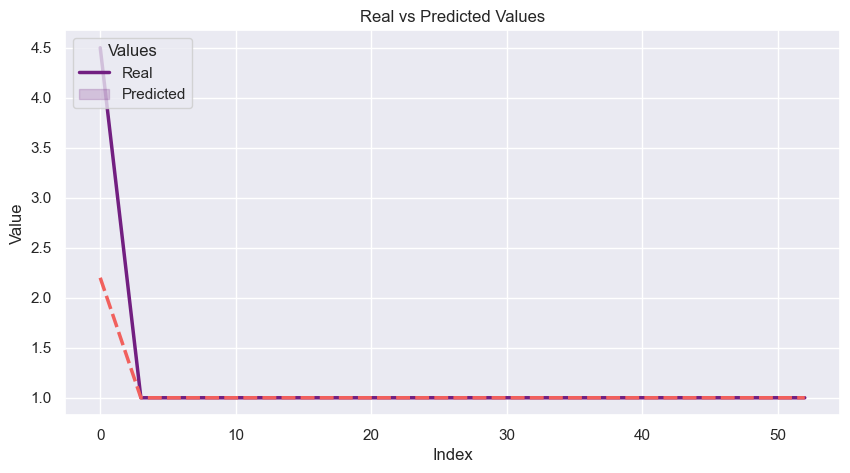

In [391]:
#Grafica para visualizar los datos reales y predecidos
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.lineplot(data=results, palette="magma", linewidth=2.5)
plt.legend(title="Values", loc="upper left", labels=["Real", "Predicted"])
plt.title("Real vs Predicted Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

C:\Users\dario\AppData\Local\Temp\ipykernel_21540\681771986.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(residuos, kde=True, palette="magma", alpha=0.7)
C:\Users\dario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


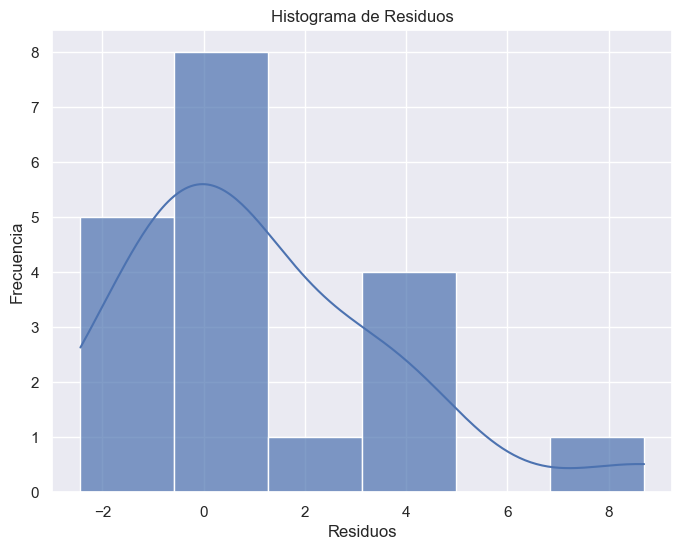

In [381]:
residuos = y_test - y_pred

# Histograma de los residuos
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, palette="magma", alpha=0.7)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Random Forest Reggresor total

In [149]:
#El mismo proceso realizado para 1 producto, se hace un for para todos los prodcutos
def calculate_average_errors(df, productos, label_encoder):
    mae_list = []
    mse_list = []
    mape_list = []

    for producto in productos:
        df_filtrado = df.loc[df['ID_Producto'] == producto]
        df_filtrado.set_index('Fecha', inplace=True)
        df_final = df_filtrado.resample('W').sum()
        df_final['Fecha'] = df_final.index
        df_final.reset_index(drop=True, inplace=True)
        df_final['Fecha_encoded'] = label_encoder.fit_transform(df_final['Fecha'])
        df_final['Buen_Fin'] = (((df_final['Fecha'] >= buen_fin_inicio2022) & (df_final['Fecha'] <= buen_fin_fin2022)) | 
                            ((df_final['Fecha'] >= buen_fin_inicio2023) & (df_final['Fecha'] <= buen_fin_fin2023))).astype(int)
        df_final['Hot_Sale'] = (((df_final['Fecha'] >= hot_sale_inicio2022) & (df_final['Fecha'] <= hot_sale_fin2022)) | 
                            ((df_final['Fecha'] >= hot_sale_inicio2023) & (df_final['Fecha'] <= hot_sale_fin2023))).astype(int)
        df_final['Fecha'] = label_encoder.fit_transform(df_final['Fecha'])
        
        X = df_final[['Region_Cadereyta', 'Region_Coahuila', 'Region_Durango',
                      'Region_Expos F', 'Region_Laredo', 'Region_Monterrey', 'Region_Online',
                      'Region_Queretaro', 'Region_Reynosa', 'Region_San Luis', 'Fecha_encoded','Buen_Fin','Hot_Sale']]
        y = df_final['Cantidad']

        if len(X) > 10: #Se reduce la muestra de prodcutos, por los problemas que pueden presentar los productos con una cantidad baja de datos
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            rf_regressor = RandomForestRegressor(n_estimators=35, random_state=42, max_depth=10, criterion='squared_error',
                                                 max_features=None, bootstrap=True, min_samples_split=2, min_samples_leaf=1)
            
            rf_regressor.fit(X_train, y_train)
            y_pred = rf_regressor.predict(X_test)
            y_test=y_test+1
            y_pred=y_pred+1
            
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            mape = np.mean(np.abs((y_test - y_pred) / (y_test))) * 100
            
            mae_list.append(mae)
            mse_list.append(mse)
            mape_list.append(mape)

    if not mae_list:
        return "No se pudo realizar la evaluación con los productos disponibles."

    mae_promedio = np.mean(mae_list)
    mse_promedio = np.mean(mse_list)
    mape_promedio = np.mean(mape_list)

    return mae_promedio, mse_promedio, mape_promedio

N = 272
productos = [f'Producto {i}' for i in range(N)]
mae_promedio, mse_promedio, mape_promedio = calculate_average_errors(df, productos, label_encoder)

print(f"MSE promedio: {mse_promedio:.2f}")
print(f"MAE promedio: {mae_promedio:.2f}")
print(f"MAPE promedio: {mape_promedio:.2f}%")

MSE promedio: 83.11
MAE promedio: 2.45
MAPE promedio: 18.97%
